In [1077]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [1170]:
df = pd.read_csv("M+E YouTube.csv")
df.head()

,Channel Name,Video title,Video ID,Video length (minutes),Video created,Watch time (minutes),Views,YouTube Red watch time (minutes),YouTube Red views,Average view duration (minutes),...,Shares,Comments,Videos in playlists,Videos added to playlists,Videos removed from playlists,Subscribers,Subscribers gained,Subscribers lost,Average percentage viewed,Watch time (hours)
0,Lip Sync Battle on Spike,"Dwayne Johnson's ""Shake It Off"" vs Jimmy Fallo...",Xn3tUOJ9yv4,5.72,2-Apr-15,121114967,37424154,321531,97285,3.2,...,167030,8163,66234,96467,30233,56496,57563,1067,56.61,2018583
1,MTV,Vin Diesel Sings 'See You Again' For Paul Walk...,ksrHwD9cZjQ,4.45,12-Apr-15,46976188,34872430,18640,15546,1.3,...,18214,7968,39061,58041,18980,17780,18090,310,30.27,782936
2,Lip Sync Battle on Spike,"Channing Tatum & Beyonce's ""Run The World (Gir...",LdfMKnJ1y2o,4.72,6-Jan-16,119699075,33092505,1249181,374532,3.6,...,189045,12068,69792,95150,25358,12537,13014,477,76.69,1994985
3,Comedy Central,Key & Peele - Substitute Teacher,Dd7FixvoKBw,3.03,12-Oct-12,72353905,28925253,407564,170838,2.5,...,225153,10459,65393,95462,30069,19670,20277,607,82.46,1205898
4,MTV,Unfriended | Official Trailer | MTV,Q72LWqCx3pc,2.77,9-Jan-15,47206042,22015998,9864,5082,2.1,...,77280,30108,21896,35966,14070,10817,11083,266,77.50,786767


# Explore the data!

In [1079]:
df.columns

Index([u'Channel Name', u'Video title', u'Video ID', u'Video length (minutes)',
       u'Video created', u'Watch time (minutes)', u'Views',
       u'YouTube Red watch time (minutes)', u'YouTube Red views',
       u'Average view duration (minutes)', u'Card clicks', u'Cards shown',
       u'Clicks per card shown', u'Card teaser clicks', u'Card teasers shown',
       u'Teaser clicks per card teaser shown', u'End screen elements shown',
       u'End screen element clicks', u'Clicks per end screen element shown',
       u'Subscriber views', u'Subscriber minutes watched',
       u'Your estimated revenue (USD)', u'Your estimated ad revenue (USD)',
       u'Your estimated AdSense revenue (USD)',
       u'Your estimated DoubleClick revenue (USD)',
       u'Your transaction revenue (USD)', u'Transactions',
       u'Your revenue per transaction (USD)', u'Estimated monetized playbacks',
       u'Playback-based CPM (USD)', u'Ad impressions', u'CPM (USD)',
       u'YouTube ad revenue (USD)', u'Your 

Looking at the columns, there are some that are not relevant to our business goals. For example, Viacom's revenue share agreement does not include YouTube Red, so I will be exlcuding those.
Not all videos include Cards or Clickable annotations, so those will be dropped.
I've also excluded all revenue-related columns.

Many variables are also derivatives of other variables, so I tried to drop as many of those as possible:

In [1080]:
cols_to_keep = ['Channel Name',
                'Views',
                'Video length (minutes)',
                'Watch time (minutes)',
                'Subscriber views',
                'Subscriber minutes watched',
                'Likes',
                'Dislikes',
                'Shares',
                'Comments',
                'Subscribers',
                'Average percentage viewed']

In [1081]:
df_raw = pd.DataFrame(data=df, columns=cols_to_keep)
df_raw.head()

,Channel Name,Views,Video length (minutes),Watch time (minutes),Subscriber views,Subscriber minutes watched,Likes,Dislikes,Shares,Comments,Subscribers,Average percentage viewed
0,Lip Sync Battle on Spike,37424154,5.72,121114967,1359890,4137034,197981,3211,167030,8163,56496,56.61
1,MTV,34872430,4.45,46976188,97771,119513,208754,3965,18214,7968,17780,30.27
2,Lip Sync Battle on Spike,33092505,4.72,119699075,1138697,4116067,230608,6237,189045,12068,12537,76.69
3,Comedy Central,28925253,3.03,72353905,1572499,3748041,204751,3486,225153,10459,19670,82.46
4,MTV,22015998,2.77,47206042,104680,215966,127052,9931,77280,30108,10817,77.50


In [1082]:
null_data = df_raw[df_raw.isnull().any(axis=1)]
null_data

,Channel Name,Views,Video length (minutes),Watch time (minutes),Subscriber views,Subscriber minutes watched,Likes,Dislikes,Shares,Comments,Subscribers,Average percentage viewed
4354,Lip Sync Battle on Spike,2973,NaN,11932,2025,8307,97,1,5,18,-2,63.7


In [1083]:
df_raw = df_raw.dropna(how='any')

In [1084]:
pd.crosstab(index=df_raw['Channel Name'], columns=df_raw['Channel Name'].count())

col_0,4702
Channel Name,
CMT,500
Comedy Central,500
Lip Sync Battle on Spike,328
LogoTV,500
MTV,498
MTV Braless,54
MTV News,322
MTV2,500
Spike,500


Here, I wanted to see if some channels produced more videos, in general. MTV Braless is the only stand-out, here, which makes sense since it's a standalone web series created 100% by one person. Overall, though, videos look to be pretty evenly distributed.

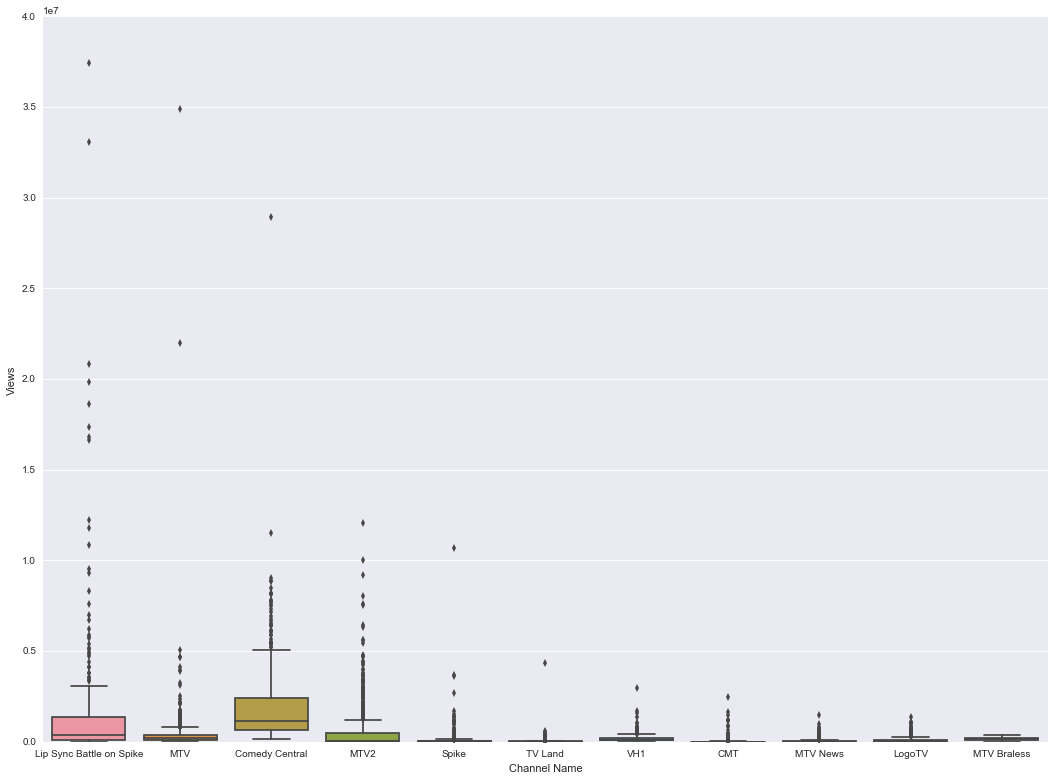

In [1085]:
sns.mpl.rc("figure", figsize=(18,13))

sns.boxplot(x=df_raw['Channel Name'], y=df_raw['Views']);

Here, you can see that the range of views varies a lot by channel. However, you can see that almost all channels have a lot of outliers. Something to keep in mind:

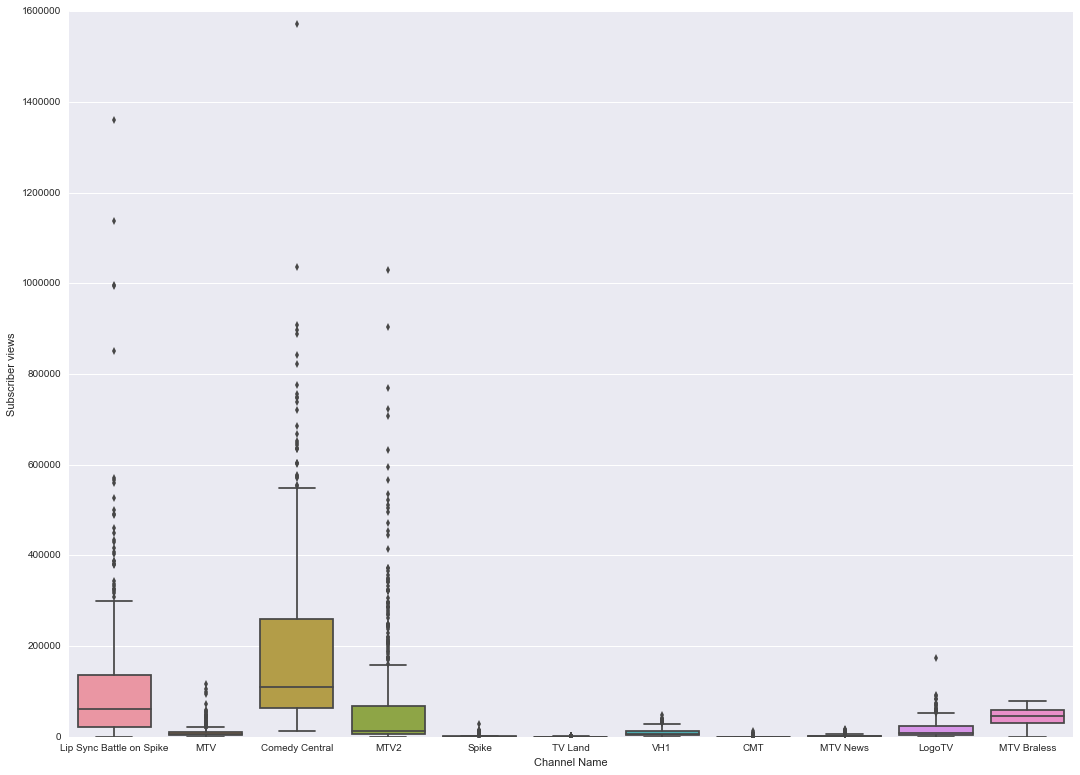

In [1086]:
sns.mpl.rc("figure", figsize=(18,13))
sns.boxplot(x=df_raw['Channel Name'], y=df_raw['Subscriber views']);

When we look at the views that are coming from Subscribers ('Subscriber views), we can see that MTV2 and Comedy Central call for a bit more attention. These channels seem to have more outliers in this view and have a higher concentration of views from from their subscribers than the other channels.

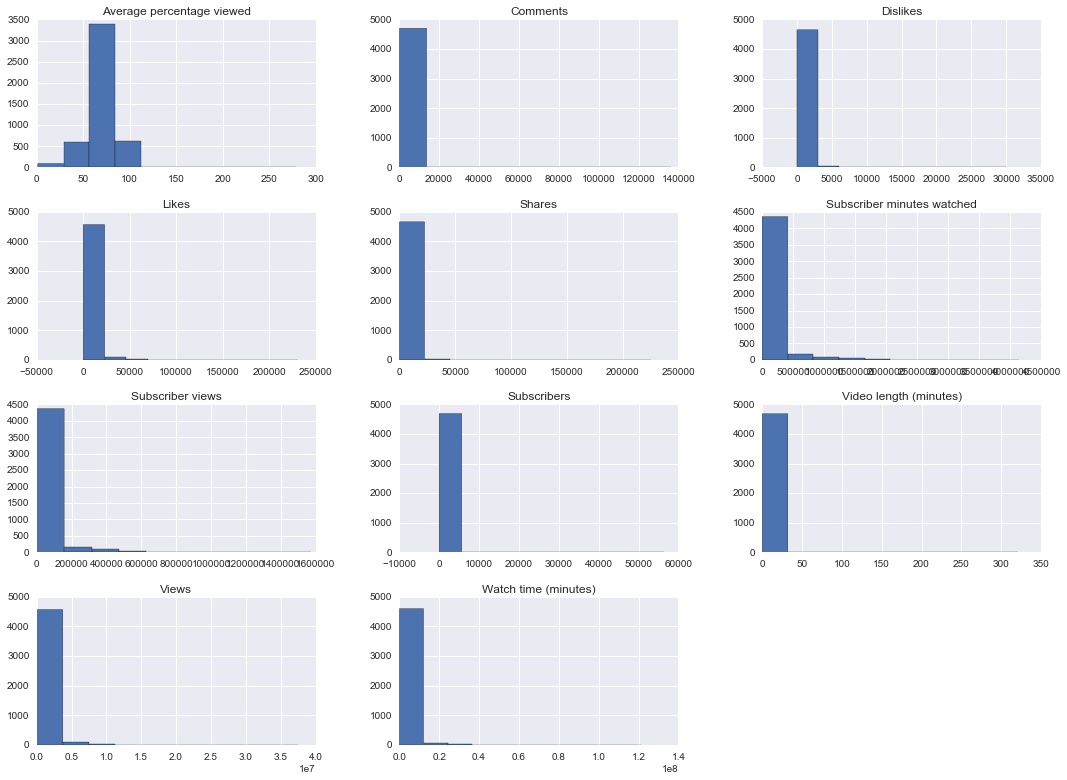

In [1089]:
df_raw.hist();

All variables are heavily skewed to the right.
Because the feature variables as well as the target are so heavily skewed, let's apply log scale:

In [1090]:
log_data = df_raw[['Views',
                 'Video length (minutes)',
                 'Watch time (minutes)',
                 'Subscriber views',
                 'Subscriber minutes watched',
                 'Likes',
                 'Dislikes',
                 'Shares',
                 'Comments','Subscribers',
                 'Average percentage viewed']].apply(np.log1p)

log_data

,Views,Video length (minutes),Watch time (minutes),Subscriber views,Subscriber minutes watched,Likes,Dislikes,Shares,Comments,Subscribers,Average percentage viewed
0,17.437827,1.905088,18.612251,14.122915,15.235490,12.195931,8.074649,12.025935,9.007490,10.941943,4.053696
1,17.367207,1.695616,17.665151,11.490394,11.691189,12.248917,8.285513,9.810001,8.983314,9.785886,3.442659
2,17.314817,1.743969,18.600491,13.945396,15.230409,12.348479,8.738415,12.149746,9.398395,9.436519,4.352727
3,17.180226,1.393766,18.097080,14.268177,15.136744,12.229555,8.156797,12.324540,9.255314,9.886901,4.424367
4,16.907280,1.327075,17.670032,11.558673,12.282881,11.752360,9.203517,11.255203,10.312579,9.288967,4.363099
5,16.852045,1.827770,18.048411,13.654502,14.878223,11.648610,7.933438,10.998560,8.687948,9.594786,4.165269
6,16.804130,0.727549,16.561688,12.907141,12.596556,11.120623,8.060540,10.250617,8.360773,9.768870,4.300681
7,16.740297,1.874874,18.022919,13.809085,15.090983,11.452368,7.789869,10.224411,8.253488,9.381264,4.195245
8,16.670660,0.470004,15.877013,13.040335,12.178563,10.402382,8.314097,9.911009,7.482119,8.324094,4.335590
9,16.637967,1.824549,17.846506,13.812990,15.077397,11.326331,7.963808,10.306817,8.313852,8.965462,4.180522


In [1144]:
# Next: create dummies for categorical value, channel name:
channels = pd.get_dummies(df_raw['Channel Name'])

# concat the dummies:
data = pd.concat([channels, log_data], axis=1)

In [1172]:
# drop nulls and infinites:
# data.replace([np.inf, -np.inf], np.nan)
data.dropna(how='any')

,CMT,Comedy Central,Lip Sync Battle on Spike,LogoTV,MTV,MTV Braless,MTV News,MTV2,Spike,TV Land,...,Video length (minutes),Watch time (minutes),Subscriber views,Subscriber minutes watched,Likes,Dislikes,Shares,Comments,Subscribers,Average percentage viewed
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.905088,18.612251,14.122915,15.235490,12.195931,8.074649,12.025935,9.007490,10.941943,4.053696
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.695616,17.665151,11.490394,11.691189,12.248917,8.285513,9.810001,8.983314,9.785886,3.442659
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.743969,18.600491,13.945396,15.230409,12.348479,8.738415,12.149746,9.398395,9.436519,4.352727
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.393766,18.097080,14.268177,15.136744,12.229555,8.156797,12.324540,9.255314,9.886901,4.424367
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.327075,17.670032,11.558673,12.282881,11.752360,9.203517,11.255203,10.312579,9.288967,4.363099
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.827770,18.048411,13.654502,14.878223,11.648610,7.933438,10.998560,8.687948,9.594786,4.165269
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.727549,16.561688,12.907141,12.596556,11.120623,8.060540,10.250617,8.360773,9.768870,4.300681
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.874874,18.022919,13.809085,15.090983,11.452368,7.789869,10.224411,8.253488,9.381264,4.195245
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.470004,15.877013,13.040335,12.178563,10.402382,8.314097,9.911009,7.482119,8.324094,4.335590
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.824549,17.846506,13.812990,15.077397,11.326331,7.963808,10.306817,8.313852,8.965462,4.180522


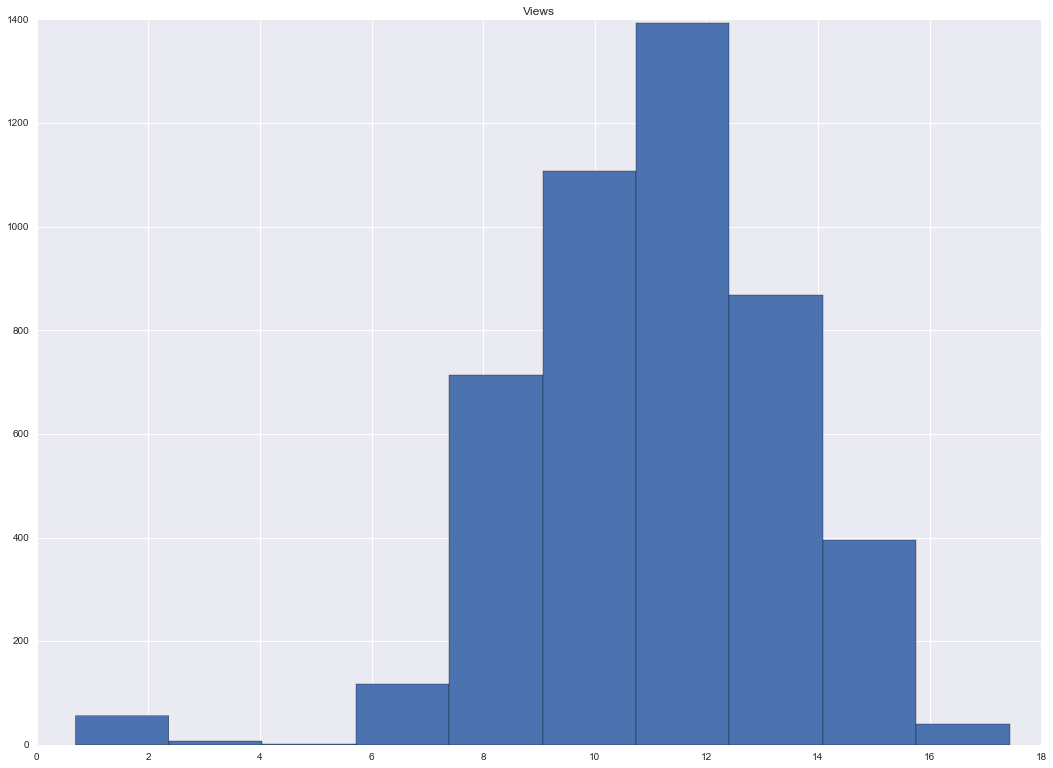

In [1204]:
data.hist('Views');

Tada! More normally distributed.

Because the views seem to vary so much by Channel Name, I decided to first run the regression on the Channel Names only:

In [1162]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score, KFold

features = ['CMT',
           'Comedy Central', 
           'Lip Sync Battle on Spike',
           'LogoTV',
           'MTV',
           'MTV Braless',
           'MTV News',
           'MTV2',
           'Spike',
           'TV Land',
           'VH1']

y = data['Views']
X = data[features]

In [1163]:
# First, I ran a Linear Regression:
k = 4
folds = KFold(len(data), n_folds=k, shuffle=True)

i = 0
scores = []
for train_idxs, test_idxs in folds:
    X_train, X_test = X.iloc[train_idxs], X.iloc[test_idxs]
    y_train, y_test = y.iloc[train_idxs], y.iloc[test_idxs]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    scores.append(score)
    i += 1

print "R-squared: ", sum(scores) / len(scores)

R-squared:  0.441470784339


In [1173]:
# Add in additional features:
features = ['CMT',
           'Comedy Central', 
           'Lip Sync Battle on Spike',
           'LogoTV',
           'MTV',
           'MTV Braless',
           'MTV News',
           'MTV2',
           'Spike',
           'TV Land',
           'VH1',
            'Video length (minutes)', 
            'Average percentage viewed']

y = data['Views']
X = data[features]

i = 0
scores = []
for train_idxs, test_idxs in folds:
    X_train, X_test = X.iloc[train_idxs], X.iloc[test_idxs]
    y_train, y_test = y.iloc[train_idxs], y.iloc[test_idxs]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    score = model.score(X_test, y_test)
    scores.append(score)
    i += 1

print "R-squared: ", sum(scores) / len(scores)

R-squared:  0.497350766927


Our R-squared doesn't improve that much. 
While we had a bunch of different data points, most are contingent on views, so it's not very practical to use them as a predictor variable.

As a result, I decided to look at video titles to see if we could see any thematic ties.


# Interesting Area To Explore:
To work with numerical data only, I initially removed the 'Video Title' variable. However, I think it is somewhat intuitive to assume that content would predict Views. So, just as an intial analysis, I decided to look at the top 100 videos across Viacom's channels and see what kind of theme may arise;

In [780]:
# New dataframe with Video titles and Views:
new_cols = ['Video title', 'Views']
nlp_df = pd.DataFrame(data=df, columns=new_cols)

# Sort by Views and return first 100:
new_df = nlp_df.sort_values(by='Views', ascending=False)
new_df.reset_index(drop=True, inplace=True)

new_df['Video title'] = new_df['Video title'].astype(str)

nlp_data = new_df[:101]

In [728]:
import os
import math
from sklearn import feature_extraction
import gensim

# import stop words;
from stop_words import get_stop_words
stop_list = get_stop_words('english')       

In [771]:
vectorizer = feature_extraction.text.CountVectorizer(stop_words = 'english')

documents = vectorizer.fit_transform(nlp_data['Video title'])

In [781]:
corpus = gensim.matutils.Sparse2Corpus(documents, documents_columns=False)
id2word = dict(enumerate(vectorizer.get_feature_names()))

model = gensim.models.ldamodel.LdaModel(corpus = corpus, num_topics = 25, id2word = id2word, passes = 10)

model.print_topics()

[(23,
  u'0.062*bye + 0.042*vs + 0.042*lip + 0.042*sync + 0.042*battle + 0.021*krasinski + 0.021*anna + 0.021*kendrick + 0.021*girl + 0.021*mackie'),
 (20,
  u'0.057*clip + 0.030*mtv + 0.030*official + 0.030*trick + 0.030*shots + 0.030*factory + 0.030*season + 0.030*fantasy + 0.030*presidential + 0.030*bernie'),
 (10,
  u'0.061*sync + 0.061*lip + 0.061*battle + 0.040*vs + 0.040*hathaway + 0.040*anne + 0.020*miles + 0.020*thousand + 0.020*diggity + 0.020*crews'),
 (18,
  u'0.040*lip + 0.040*battle + 0.040*sync + 0.040*vs + 0.040*legend + 0.040*common + 0.040*john + 0.040*touch + 0.040*night + 0.040*long'),
 (24,
  u'0.081*battle + 0.061*lip + 0.061*sync + 0.041*vs + 0.021*trailer + 0.021*mariah + 0.021*carey + 0.021*hayden + 0.021*marmalade + 0.021*panettiere'),
 (6,
  u'0.070*peele + 0.070*key + 0.026*vs + 0.025*trailer + 0.025*mtv + 0.025*official + 0.025*2015 + 0.025*straight + 0.025*compton + 0.025*movie'),
 (22,
  u'0.055*wildstyle + 0.055*wild + 0.028*red + 0.028*team + 0.028*snoo

Kind of hard to distinguish any themes here.... There is just too much concentration of Lip Sync Battle clips. So, I excluded LSB and ran the entire thing on just one network (Comedy Central)

In [803]:
# Creating a new dataframe, excluding Lip Sync Battle:
cols = ['Channel Name', 'Video title', 'Views']
dff = pd.DataFrame(data=df, columns=cols)

dff = dff[dff['Channel Name'] == "Comedy Central"]

# Sort by Views and return first 100:
new = dff.sort_values(by='Views', ascending=False)
new.reset_index(drop=True, inplace=True)

new = new[:101]


vectorizer = feature_extraction.text.CountVectorizer(stop_words = 'english')

documents = vectorizer.fit_transform(new['Video title'])

corpus = gensim.matutils.Sparse2Corpus(documents, documents_columns=False)
id2word = dict(enumerate(vectorizer.get_feature_names()))

model = gensim.models.ldamodel.LdaModel(corpus = corpus, num_topics = 25, id2word = id2word, passes = 10)

model.print_topics()

[(6,
  u'0.162*key + 0.162*peele + 0.081*uncensored + 0.028*hit + 0.028*meegan + 0.028*andre + 0.028*yo + 0.028*mama + 0.028*health + 0.028*problems'),
 (10,
  u'0.136*key + 0.136*peele + 0.047*game + 0.047*pre + 0.047*breakfast + 0.047*backhand + 0.047*pump + 0.047*continental + 0.047*fronthand + 0.002*uncensored'),
 (13,
  u'0.004*peele + 0.004*key + 0.004*uncensored + 0.004*bowl + 0.004*obama + 0.004*college + 0.004*daily + 0.004*nooice + 0.004*west + 0.004*ass'),
 (24,
  u'0.142*key + 0.142*peele + 0.049*telemarketer + 0.049*shady + 0.049*school + 0.049*bully + 0.049*landlord + 0.049*uncensored + 0.002*obama + 0.002*inside'),
 (8,
  u'0.174*peele + 0.174*key + 0.050*uncensored + 0.026*obama + 0.026*meet + 0.026*conference + 0.026*press + 0.026*teacher + 0.026*little + 0.026*greet'),
 (19,
  u'0.111*key + 0.111*peele + 0.057*uncensored + 0.057*retired + 0.057*specialist + 0.057*military + 0.057*snitch + 0.002*black + 0.002*daily + 0.002*gay'),
 (17,
  u'0.184*peele + 0.184*key + 0.0

From here, you can make a couple assumptions:
* Key & Peele clips do the best on Comedy Central, even after their departure from the network
* Clips including athletes (Marshawn Lynch, Richard Sherman) also do well
* Videos featuring/about Obama (Luther, Obama's Anger Translator) also bubbled up as a theme
* Clips centering on issues of race/homophobia also seemed to be high-performing

SO: let's look at the dataframe in its entirety:

In [1194]:
# New dataframe with Video titles and Views:
new = pd.read_csv("M+E YouTube.csv")
cols = ['Video title', 'Views']
titles = pd.DataFrame(data=new, columns=cols)

titles.head()

,Video title,Views
0,"Dwayne Johnson's ""Shake It Off"" vs Jimmy Fallo...",37424154
1,Vin Diesel Sings 'See You Again' For Paul Walk...,34872430
2,"Channing Tatum & Beyonce's ""Run The World (Gir...",33092505
3,Key & Peele - Substitute Teacher,28925253
4,Unfriended | Official Trailer | MTV,22015998


In [1195]:
vectorizer = feature_extraction.text.CountVectorizer(stop_words = 'english')

documents = vectorizer.fit_transform(nlp_data['Video title'])

In [1196]:
corpus = gensim.matutils.Sparse2Corpus(documents, documents_columns=False)
id2word = dict(enumerate(vectorizer.get_feature_names()))

model = gensim.models.ldamodel.LdaModel(corpus = corpus, num_topics = 25, id2word = id2word, passes = 10)

topics = model.print_topics()

topics

[(21,
  u'0.058*peele + 0.058*key + 0.058*order + 0.058*pizza + 0.002*battle + 0.002*uncensored + 0.002*lip + 0.002*sync + 0.002*vs + 0.002*wild'),
 (9,
  u'0.050*battle + 0.050*sync + 0.050*lip + 0.047*vs + 0.047*peele + 0.047*key + 0.032*hough + 0.016*julianne + 0.016*derek + 0.016*mackie'),
 (1,
  u'0.105*peele + 0.105*key + 0.040*uncensored + 0.016*wildstyle + 0.016*wild + 0.014*conference + 0.014*richard + 0.014*lynch + 0.014*sherman + 0.014*press'),
 (12,
  u'0.055*peele + 0.055*key + 0.055*awesome + 0.055*hitler + 0.055*story + 0.002*battle + 0.002*uncensored + 0.002*lip + 0.002*sync + 0.002*wildstyle'),
 (19,
  u'0.082*key + 0.082*peele + 0.028*wild + 0.028*wildstyle + 0.028*azalea + 0.028*dissed + 0.028*iggy + 0.028*lakers + 0.028*young + 0.028*college'),
 (22,
  u'0.103*lip + 0.103*sync + 0.098*battle + 0.088*vs + 0.046*john + 0.037*kendrick + 0.037*anna + 0.027*krasinski + 0.019*like + 0.019*bieber'),
 (14,
  u'0.093*wild + 0.066*wildstyle + 0.047*team + 0.047*red + 0.026*ri

It doesn't look like there are clear topics emerging, so we will have to create our own content-related variables (has_celeb, music, comedy, etc.)